## importing data and libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
all_alpha_08 = pd.read_csv("all_alpha_08.csv")
all_alpha_08.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Stnd,Underhood ID,Veh Class,Air Pollution Score,FE Calc Appr,City MPG,Hwy MPG,Cmb MPG,Unadj Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT03.7PKR,SUV,7,Drv,15,20,17,22.0527,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT03.7PKR,SUV,6,Drv,15,20,17,22.0527,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT02.3DKR,SUV,7,Drv,17,22,19,24.1745,5,no
3,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT02.3DKR,SUV,6,Drv,17,22,19,24.1745,5,no
4,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXV03.5HKR,midsize car,7,Drv,16,24,19,24.5629,5,no


In [3]:
all_alpha_18 = pd.read_csv("all_alpha_18.csv")
all_alpha_18.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
1,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,CA,U2,California LEV-II ULEV,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
2,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,19,27,22,4,No,402
3,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,CA,U2,California LEV-II ULEV,JHNXT03.5GV3,small SUV,3,19,27,22,4,No,402
4,ACURA TLX,2.4,4.0,AMS-8,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,JHNXV02.4WH3,small car,3,23,33,27,6,No,330


## analyzing data

In [4]:
all_alpha_08.shape

(2404, 18)

In [5]:
all_alpha_18.shape

(1611, 18)

In [6]:
all_alpha_08.duplicated( keep='first').sum()


25

In [7]:
all_alpha_08.isnull().sum().sum()


1685

In [8]:
all_alpha_18.duplicated( keep='first').sum()


0

In [9]:
all_alpha_18.isnull().sum(axis = 1)


0       0
1       0
2       0
3       0
4       0
       ..
1606    0
1607    0
1608    0
1609    0
1610    0
Length: 1611, dtype: int64

In [10]:
all_alpha_08.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2404 entries, 0 to 2403
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 2404 non-null   object 
 1   Displ                 2404 non-null   float64
 2   Cyl                   2205 non-null   object 
 3   Trans                 2205 non-null   object 
 4   Drive                 2311 non-null   object 
 5   Fuel                  2404 non-null   object 
 6   Sales Area            2404 non-null   object 
 7   Stnd                  2404 non-null   object 
 8   Underhood ID          2404 non-null   object 
 9   Veh Class             2404 non-null   object 
 10  Air Pollution Score   2404 non-null   object 
 11  FE Calc Appr          2205 non-null   object 
 12  City MPG              2205 non-null   object 
 13  Hwy MPG               2205 non-null   object 
 14  Cmb MPG               2205 non-null   object 
 15  Unadj Cmb MPG        

In [11]:
all_alpha_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1611 entries, 0 to 1610
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 1611 non-null   object 
 1   Displ                 1609 non-null   float64
 2   Cyl                   1609 non-null   float64
 3   Trans                 1611 non-null   object 
 4   Drive                 1611 non-null   object 
 5   Fuel                  1611 non-null   object 
 6   Cert Region           1611 non-null   object 
 7   Stnd                  1611 non-null   object 
 8   Stnd Description      1611 non-null   object 
 9   Underhood ID          1611 non-null   object 
 10  Veh Class             1611 non-null   object 
 11  Air Pollution Score   1611 non-null   int64  
 12  City MPG              1611 non-null   object 
 13  Hwy MPG               1611 non-null   object 
 14  Cmb MPG               1611 non-null   object 
 15  Greenhouse Gas Score 

In [12]:
all_alpha_08.isna().sum()

Model                     0
Displ                     0
Cyl                     199
Trans                   199
Drive                    93
Fuel                      0
Sales Area                0
Stnd                      0
Underhood ID              0
Veh Class                 0
Air Pollution Score       0
FE Calc Appr            199
City MPG                199
Hwy MPG                 199
Cmb MPG                 199
Unadj Cmb MPG           199
Greenhouse Gas Score    199
SmartWay                  0
dtype: int64

In [13]:
all_alpha_18.isna().sum()

Model                   0
Displ                   2
Cyl                     2
Trans                   0
Drive                   0
Fuel                    0
Cert Region             0
Stnd                    0
Stnd Description        0
Underhood ID            0
Veh Class               0
Air Pollution Score     0
City MPG                0
Hwy MPG                 0
Cmb MPG                 0
Greenhouse Gas Score    0
SmartWay                0
Comb CO2                0
dtype: int64

In [14]:
all_alpha_08.shape[0] - all_alpha_08.dropna().shape[0]


199

In [15]:
all_alpha_18.shape[0] - all_alpha_18.dropna().shape[0]


2

In [16]:
len(set(all_alpha_08["SmartWay"].dropna()))

2

In [17]:
len(set(all_alpha_18["SmartWay"].dropna()))

3

In [18]:
len(set(all_alpha_08["Sales Area"].dropna()))

3

In [19]:
len(set(all_alpha_18["Cert Region"].dropna()))

2

In [20]:
len(set(all_alpha_08["Trans"].dropna()))

14

In [21]:
pd.value_counts(all_alpha_08["Fuel"])

Gasoline       2318
ethanol/gas      72
diesel           11
CNG               2
ethanol           1
Name: Fuel, dtype: int64

In [22]:
pd.value_counts(all_alpha_18["Fuel"])

Gasoline                1492
Ethanol/Gas               55
Diesel                    38
Gasoline/Electricity      24
Electricity                2
Name: Fuel, dtype: int64

In [23]:
all_alpha_08.shape

(2404, 18)

## Cleaning Column Labels

### Drop Extraneous Columns

In [24]:
df_08 = all_alpha_08.drop(['Stnd', 'Underhood ID', 'FE Calc Appr', 'Unadj Cmb MPG'], axis = 1)

In [25]:
df_18 = all_alpha_18.drop(['Stnd', 'Stnd Description', 'Underhood ID', 'Comb CO2'], axis = 1)

### Rename Columns

In [26]:
df_08.rename(columns = {'Sales Area' : 'Cert Region'} , inplace = True)

In [27]:
df_08.columns = df_08.columns.str.replace(' ','_')
df_18.columns = df_18.columns.str.replace(' ','_')

In [28]:
df_08.columns = df_08.columns.str.lower()
df_18.columns = df_18.columns.str.lower()

In [29]:
df_08.columns

Index(['model', 'displ', 'cyl', 'trans', 'drive', 'fuel', 'cert_region',
       'veh_class', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg',
       'greenhouse_gas_score', 'smartway'],
      dtype='object')

## Filter, Drop Nulls, Dedupe

### Filter by Certification Region

In [30]:
df_08.query('cert_region == "CA"' , inplace = True)
df_18.query('cert_region == "CA"' , inplace = True)

In [31]:
# drop certification region columns form both datasets
df_08.drop('cert_region', axis=1, inplace=True)
df_18.drop('cert_region', axis=1, inplace=True)

In [32]:
df_08.shape

(1084, 13)

In [33]:
df_18.shape

(798, 13)

### Drop Rows with Missing Values

In [34]:
df_08.dropna(inplace = True)
df_18.dropna(inplace = True)

In [35]:
df_08.shape

(1009, 13)

In [36]:
df_18.shape

(797, 13)

### Drop duplicate values

In [37]:
df_08.drop_duplicates(inplace = True)
df_18.drop_duplicates(inplace = True)

In [38]:
df_08.shape

(986, 13)

In [39]:
df_18.shape

(794, 13)

## Fixing cyl Data Type

### Extract int from strings in the 2008 cyl column

In [40]:
df_08['cyl'] = df_08['cyl'].str.extract('(\d+)').astype(int)

In [41]:
df_08['cyl'].value_counts()

6     409
4     283
8     199
5      48
12     30
10     14
2       2
16      1
Name: cyl, dtype: int64

### convert 2018 cyl column to int

In [42]:
df_18['cyl'] = df_18['cyl'].astype(int)

In [43]:
df_18['cyl'].value_counts()

4     365
6     246
8     153
3      18
12      9
5       2
16      1
Name: cyl, dtype: int64

## Fixing other Data Types

In [44]:
#  First, let's get all the hybrids in 2008
hb_08 = df_08[df_08['fuel'].str.contains('/')]
hb_08

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


In [45]:
# hybrids in 2018
hb_18 = df_18[df_18['fuel'].str.contains('/')]
hb_18

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
108,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,3,28/66,34/78,30/71,10,Yes
160,BMW 530e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,7,27/70,31/75,29/72,10,Elite
162,BMW 530e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,small car,7,27/66,31/68,28/67,10,Elite
188,BMW 740e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,large car,3,25/62,29/68,27/64,9,Yes
382,CHEVROLET Impala,3.6,6,SemiAuto-6,2WD,Ethanol/Gas,large car,5,14/18,20/28,16/22,4,No
394,CHEVROLET Silverado 15,4.3,6,Auto-6,2WD,Ethanol/Gas,pickup,5,12/18,16/24,14/20,4,No
396,CHEVROLET Silverado 15,4.3,6,Auto-6,4WD,Ethanol/Gas,pickup,5,12/17,15/22,13/19,3,No
398,CHEVROLET Silverado 15,5.3,8,Auto-6,2WD,Ethanol/Gas,pickup,3,12/16,17/23,14/19,3,No
428,CHEVROLET Suburban 1500,5.3,8,Auto-6,2WD,Ethanol/Gas,standard SUV,3,12/16,17/23,14/19,3,No
432,CHEVROLET Suburban 1500,5.3,8,Auto-6,4WD,Ethanol/Gas,standard SUV,3,11/16,15/22,12/18,3,No


### Fixing 2008 dataset

In [46]:
# create two copies of the 2008 hybrids dataframe
df1 = hb_08.copy()  # data on first fuel type of each hybrid vehicle
df2 = hb_08.copy()  # data on second fuel type of each hybrid vehicle

# Each one should look like this
df1

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


In [47]:
# columns to split by "/"
split_columns = ['fuel', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg', 'greenhouse_gas_score']

# apply split function to each column of each dataframe copy
for c in split_columns:
    df1[c] = df1[c].apply(lambda x: x.split("/")[0])
    df2[c] = df2[c].apply(lambda x: x.split("/")[1])

In [48]:
# this dataframe holds info for the FIRST fuel type of the hybrid
# aka the values before the "/"s
df1

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6,13,19,15,7,no


In [49]:
# this dataframe holds info for the SECOND fuel type of the hybrid
# aka the values after the "/"s
df2

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,small car,4,18,25,21,6,no


In [50]:
# combine dataframes to add to the original dataframe
new_rows = df1.append(df2)

# now we have separate rows for each fuel type of each vehicle!
new_rows

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6,13,19,15,7,no
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,small car,4,18,25,21,6,no


In [51]:
# drop the original hybrid rows
df_08.drop(hb_08.index, inplace=True)

# add in our newly separated rows
df_08 = df_08.append(new_rows, ignore_index=True)

In [52]:
# check that all the original hybrid rows with "/"s are gone
df_08[df_08['fuel'].str.contains('/')]

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway


In [53]:
# converting from string to float
String_number_columns = [ 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg', 'greenhouse_gas_score']

for col in String_number_columns:
    df_08[col] = df_08[col].astype(float)


In [54]:
df_08.shape

(987, 13)

### Repeat this process for the 2018 dataset

In [55]:
# create two copies of the 2008 hybrids dataframe
df1 = hb_18.copy()  # data on first fuel type of each hybrid vehicle
df2 = hb_18.copy()  # data on second fuel type of each hybrid vehicle

# Each one should look like this
df1

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
108,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,3,28/66,34/78,30/71,10,Yes
160,BMW 530e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,7,27/70,31/75,29/72,10,Elite
162,BMW 530e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,small car,7,27/66,31/68,28/67,10,Elite
188,BMW 740e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,large car,3,25/62,29/68,27/64,9,Yes
382,CHEVROLET Impala,3.6,6,SemiAuto-6,2WD,Ethanol/Gas,large car,5,14/18,20/28,16/22,4,No
394,CHEVROLET Silverado 15,4.3,6,Auto-6,2WD,Ethanol/Gas,pickup,5,12/18,16/24,14/20,4,No
396,CHEVROLET Silverado 15,4.3,6,Auto-6,4WD,Ethanol/Gas,pickup,5,12/17,15/22,13/19,3,No
398,CHEVROLET Silverado 15,5.3,8,Auto-6,2WD,Ethanol/Gas,pickup,3,12/16,17/23,14/19,3,No
428,CHEVROLET Suburban 1500,5.3,8,Auto-6,2WD,Ethanol/Gas,standard SUV,3,12/16,17/23,14/19,3,No
432,CHEVROLET Suburban 1500,5.3,8,Auto-6,4WD,Ethanol/Gas,standard SUV,3,11/16,15/22,12/18,3,No


In [56]:
# columns to split by "/"
split_columns = ['fuel', 'city_mpg', 'hwy_mpg', 'cmb_mpg']

# apply split function to each column of each dataframe copy
for c in split_columns:
    df1[c] = df1[c].apply(lambda x: x.split("/")[0])
    df2[c] = df2[c].apply(lambda x: x.split("/")[1] if len(x.split("/")) == 2 else x)

In [57]:
# this dataframe holds info for the First fuel type of the hybrid
# aka the values after the "/"s
df1

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
108,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline,small car,3,28,34,30,10,Yes
160,BMW 530e,2.0,4,SemiAuto-8,2WD,Gasoline,small car,7,27,31,29,10,Elite
162,BMW 530e,2.0,4,SemiAuto-8,4WD,Gasoline,small car,7,27,31,28,10,Elite
188,BMW 740e,2.0,4,SemiAuto-8,4WD,Gasoline,large car,3,25,29,27,9,Yes
382,CHEVROLET Impala,3.6,6,SemiAuto-6,2WD,Ethanol,large car,5,14,20,16,4,No
394,CHEVROLET Silverado 15,4.3,6,Auto-6,2WD,Ethanol,pickup,5,12,16,14,4,No
396,CHEVROLET Silverado 15,4.3,6,Auto-6,4WD,Ethanol,pickup,5,12,15,13,3,No
398,CHEVROLET Silverado 15,5.3,8,Auto-6,2WD,Ethanol,pickup,3,12,17,14,3,No
428,CHEVROLET Suburban 1500,5.3,8,Auto-6,2WD,Ethanol,standard SUV,3,12,17,14,3,No
432,CHEVROLET Suburban 1500,5.3,8,Auto-6,4WD,Ethanol,standard SUV,3,11,15,12,3,No


In [58]:
# this dataframe holds info for the SECOND fuel type of the hybrid
# aka the values after the "/"s
df2

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
108,BMW 330e,2.0,4,SemiAuto-8,2WD,Electricity,small car,3,66,78,71,10,Yes
160,BMW 530e,2.0,4,SemiAuto-8,2WD,Electricity,small car,7,70,75,72,10,Elite
162,BMW 530e,2.0,4,SemiAuto-8,4WD,Electricity,small car,7,66,68,67,10,Elite
188,BMW 740e,2.0,4,SemiAuto-8,4WD,Electricity,large car,3,62,68,64,9,Yes
382,CHEVROLET Impala,3.6,6,SemiAuto-6,2WD,Gas,large car,5,18,28,22,4,No
394,CHEVROLET Silverado 15,4.3,6,Auto-6,2WD,Gas,pickup,5,18,24,20,4,No
396,CHEVROLET Silverado 15,4.3,6,Auto-6,4WD,Gas,pickup,5,17,22,19,3,No
398,CHEVROLET Silverado 15,5.3,8,Auto-6,2WD,Gas,pickup,3,16,23,19,3,No
428,CHEVROLET Suburban 1500,5.3,8,Auto-6,2WD,Gas,standard SUV,3,16,23,19,3,No
432,CHEVROLET Suburban 1500,5.3,8,Auto-6,4WD,Gas,standard SUV,3,16,22,18,3,No


In [59]:
# combine dataframes to add to the original dataframe
new_rows = df1.append(df2)

# now we have separate rows for each fuel type of each vehicle!
new_rows.shape

(76, 13)

In [60]:
new_rows.drop_duplicates(inplace = True)
new_rows.shape

(76, 13)

In [61]:
# drop the original hybrid rows
df_18.drop(hb_18.index, inplace=True)

# add in our newly separated rows
df_18 = df_18.append(new_rows, ignore_index=True)

In [62]:
# check that all the original hybrid rows with "/"s are gone
df_08[df_08['fuel'].str.contains('/')]

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway


In [63]:
df_08.shape

(987, 13)

In [64]:
df_18.shape

(832, 13)

In [65]:
# converting from string to float
String_number_columns = [ 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg', 'greenhouse_gas_score']

for col in String_number_columns:
    df_18[col] = df_18[col].astype(float)

## Fix greenhouse_gas_score datatype

In [66]:
# convert from float to int
df_08['greenhouse_gas_score'] = df_08['greenhouse_gas_score'].astype(int)

## All the dataypes are now fixed! Take one last check to confirm all the changes.

In [67]:
df_08.dtypes

model                    object
displ                   float64
cyl                       int64
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score     float64
city_mpg                float64
hwy_mpg                 float64
cmb_mpg                 float64
greenhouse_gas_score      int64
smartway                 object
dtype: object

In [68]:
df_18.dtypes

model                    object
displ                   float64
cyl                       int64
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score     float64
city_mpg                float64
hwy_mpg                 float64
cmb_mpg                 float64
greenhouse_gas_score    float64
smartway                 object
dtype: object

In [69]:
df_08.dtypes == df_18.dtypes

model                    True
displ                    True
cyl                      True
trans                    True
drive                    True
fuel                     True
veh_class                True
air_pollution_score      True
city_mpg                 True
hwy_mpg                  True
cmb_mpg                  True
greenhouse_gas_score    False
smartway                 True
dtype: bool

In [70]:
# Save your final CLEAN datasets as new files!
df_08.to_csv('clean_08.csv', index=False)
df_18.to_csv('clean_18.csv', index=False)

## Exploring with Visuals

<AxesSubplot:ylabel='Frequency'>

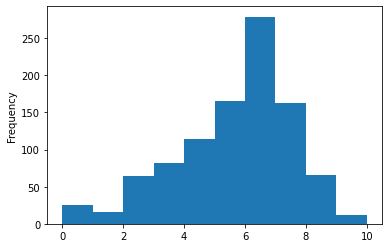

In [71]:
df_08["greenhouse_gas_score"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

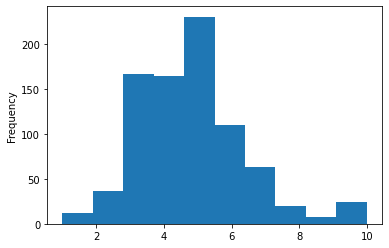

In [72]:
df_18["greenhouse_gas_score"].plot.hist()

<AxesSubplot:>

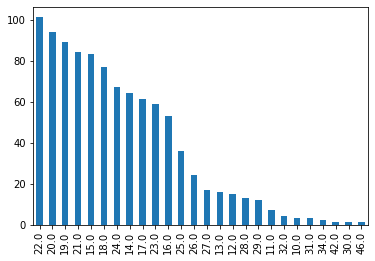

In [73]:
df_08["cmb_mpg"].value_counts().plot(kind='bar')

<AxesSubplot:>

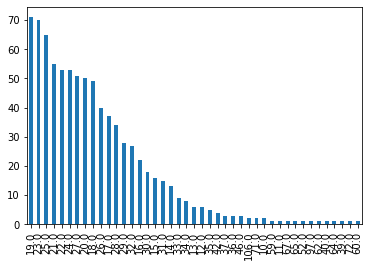

In [74]:
df_18["cmb_mpg"].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='cmb_mpg', ylabel='displ'>

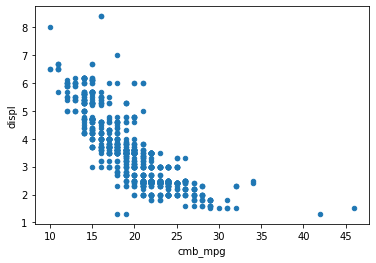

In [75]:
df_08.plot.scatter(x = 'cmb_mpg' , y = "displ")

<AxesSubplot:xlabel='cmb_mpg', ylabel='displ'>

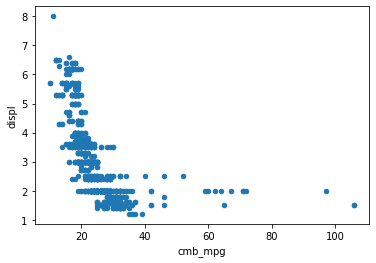

In [76]:
df_18.plot.scatter(x = 'cmb_mpg' , y = "displ")

<AxesSubplot:xlabel='cmb_mpg', ylabel='greenhouse_gas_score'>

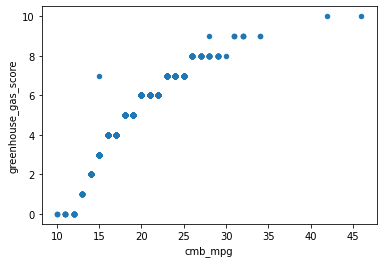

In [77]:
df_08.plot.scatter(x = 'cmb_mpg' , y = "greenhouse_gas_score")

<AxesSubplot:xlabel='cmb_mpg', ylabel='greenhouse_gas_score'>

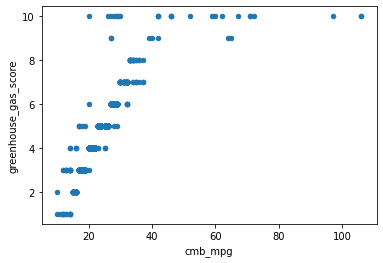

In [78]:
df_18.plot.scatter(x = 'cmb_mpg' , y = "greenhouse_gas_score")

# Drawing Conclusions

### Q1: Are more unique models using alternative sources of fuel? By how much?

In [79]:
df_08.fuel.value_counts()

Gasoline    984
CNG           1
gas           1
ethanol       1
Name: fuel, dtype: int64

In [80]:
df_18.fuel.value_counts()

Gasoline       749
Ethanol         26
Gas             26
Diesel          19
Electricity     12
Name: fuel, dtype: int64

In [81]:
# how many unique models used alternative sources of fuel in 2008
alt_08 = df_08.query('fuel in ["CNG", "ethanol"]').model.nunique()
alt_08

2

In [82]:
# how many unique models used alternative sources of fuel in 2018
alt_18 = df_18.query('fuel in ["Ethanol", "Electricity"]').model.nunique()
alt_18

26

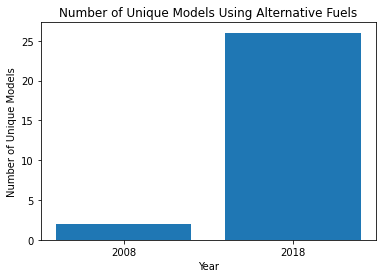

In [83]:
plt.bar(["2008", "2018"], [alt_08, alt_18])
plt.title("Number of Unique Models Using Alternative Fuels")
plt.xlabel("Year")
plt.ylabel("Number of Unique Models");

In [84]:
# total unique models each year
total_08 = df_08.model.nunique()
total_18 = df_18.model.nunique()
total_08, total_18

(377, 357)

In [85]:
prop_08 = alt_08/total_08
prop_18 = alt_18/total_18
prop_08, prop_18

(0.005305039787798408, 0.07282913165266107)

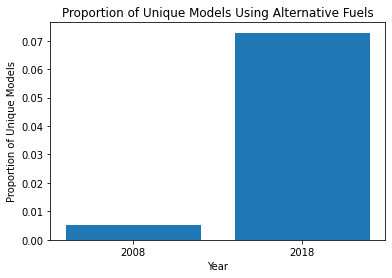

In [86]:
plt.bar(["2008", "2018"], [prop_08, prop_18])
plt.title("Proportion of Unique Models Using Alternative Fuels")
plt.xlabel("Year")
plt.ylabel("Proportion of Unique Models");

### Q2: How much have vehicle classes improved in fuel economy?  

In [87]:
veh_08 = df_08.groupby('veh_class').cmb_mpg.mean()
veh_08

veh_class
SUV              18.471429
large car        18.509091
midsize car      21.601449
minivan          19.117647
pickup           16.277108
small car        21.105105
station wagon    22.366667
van              14.952381
Name: cmb_mpg, dtype: float64

In [88]:
veh_18 = df_18.groupby('veh_class').cmb_mpg.mean()
veh_18

veh_class
large car          23.409091
midsize car        27.884058
minivan            20.800000
pickup             18.589744
small SUV          24.074074
small car          25.421053
special purpose    18.500000
standard SUV       18.197674
station wagon      27.529412
Name: cmb_mpg, dtype: float64

In [89]:
# how much they've increased by for each vehicle class
inc = veh_18 - veh_08
inc

veh_class
SUV                     NaN
large car          4.900000
midsize car        6.282609
minivan            1.682353
pickup             2.312635
small SUV               NaN
small car          4.315948
special purpose         NaN
standard SUV            NaN
station wagon      5.162745
van                     NaN
Name: cmb_mpg, dtype: float64

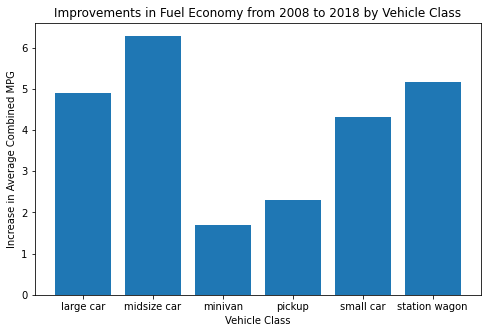

In [90]:
# only plot the classes that exist in both years
inc.dropna(inplace=True)
plt.subplots(figsize=(8, 5))
plt.bar(inc.index, inc)
plt.title('Improvements in Fuel Economy from 2008 to 2018 by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('Increase in Average Combined MPG');

### Q3: What are the characteristics of SmartWay vehicles? Have they changed over time?


In [91]:
# smartway labels for 2008
df_08.smartway.unique()

array(['no', 'yes'], dtype=object)

In [92]:
# get all smartway vehicles in 2008
smart_08 = df_08.query('smartway == "yes"')

In [93]:
# explore smartway vehicles in 2008
smart_08.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,2.602895,4.826316,7.365789,20.984211,28.413158,23.736842,6.868421
std,0.623436,1.002025,1.148195,3.442672,3.075194,3.060379,0.827338
min,1.300000,4.000000,6.000000,17.000000,22.000000,20.000000,6.000000
25%,2.275000,4.000000,7.000000,19.000000,26.000000,22.000000,6.000000
50%,2.400000,4.000000,7.000000,20.000000,28.000000,23.000000,7.000000
75%,3.000000,6.000000,7.000000,22.000000,30.000000,25.000000,7.000000
max,5.000000,8.000000,9.500000,48.000000,45.000000,46.000000,10.000000


In [94]:
# smartway labels for 2018
df_18.smartway.unique()

array(['No', 'Yes', 'Elite'], dtype=object)

In [95]:
# get all smartway vehicles in 2018
smart_18 = df_18.query('smartway in ["Yes", "Elite"]')

In [96]:
smart_18.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,1.787963,3.935185,5.212963,34.907407,41.472222,37.361111,7.925926
std,0.408031,0.416329,1.798498,16.431982,13.095236,14.848429,1.197378
min,1.200000,3.000000,3.000000,25.000000,27.000000,26.000000,7.000000
25%,1.500000,4.000000,3.000000,28.000000,36.000000,31.000000,7.000000
50%,1.700000,4.000000,5.500000,28.500000,37.000000,32.000000,7.000000
75%,2.000000,4.000000,7.000000,31.250000,40.250000,35.000000,9.000000
max,3.500000,6.000000,7.000000,113.000000,99.000000,106.000000,10.000000


### Q4: What features are associated with better fuel economy?

In [97]:
top_08 = df_08.query('cmb_mpg > cmb_mpg.mean()')
top_08.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000
mean,2.667823,4.890173,6.998073,20.317919,27.603083,22.992293,6.639692
std,0.665551,1.034856,1.159565,3.198257,3.051120,2.926371,0.804935
min,1.300000,4.000000,4.000000,17.000000,20.000000,20.000000,6.000000
25%,2.300000,4.000000,6.000000,18.000000,25.000000,21.000000,6.000000
50%,2.500000,4.000000,7.000000,20.000000,27.000000,22.000000,6.000000
75%,3.000000,6.000000,7.000000,21.000000,29.000000,24.000000,7.000000
max,6.000000,8.000000,9.500000,48.000000,45.000000,46.000000,10.000000


In [98]:
top_18 = df_18.query('cmb_mpg > cmb_mpg.mean()')
top_18.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000
mean,1.964329,4.021341,4.856707,27.472561,35.304878,30.411585,6.329268
std,0.398593,0.465477,1.860802,11.033692,9.024857,10.081539,1.410358
min,1.200000,3.000000,1.000000,21.000000,27.000000,25.000000,4.000000
25%,1.600000,4.000000,3.000000,23.000000,31.000000,26.000000,5.000000
50%,2.000000,4.000000,5.000000,25.000000,33.000000,28.000000,6.000000
75%,2.000000,4.000000,7.000000,28.000000,36.000000,31.000000,7.000000
max,3.500000,6.000000,7.000000,113.000000,99.000000,106.000000,10.000000


# Merging Datasets
Use Pandas Merges to create a combined dataset.

### Create combined dataset

In [99]:
# rename 2008 columns
df_08.rename(columns=lambda x: x[:10] + "_2008", inplace=True)

In [100]:
# view to check names
df_08.head()

,model_2008,displ_2008,cyl_2008,trans_2008,drive_2008,fuel_2008,veh_class_2008,air_pollut_2008,city_mpg_2008,hwy_mpg_2008,cmb_mpg_2008,greenhouse_2008,smartway_2008
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,4,no
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,19.0,5,no
2,ACURA RL,3.5,6,Auto-S5,4WD,Gasoline,midsize car,7.0,16.0,24.0,19.0,5,no
3,ACURA TL,3.2,6,Auto-S5,2WD,Gasoline,midsize car,7.0,18.0,26.0,21.0,6,yes
4,ACURA TL,3.5,6,Auto-S5,2WD,Gasoline,midsize car,7.0,17.0,26.0,20.0,6,yes


In [101]:
# merge datasets
df_combined = df_08.merge(df_18, left_on='model_2008', right_on='model', how='inner')

In [102]:
# view to check merge
df_combined.head()

,model_2008,displ_2008,cyl_2008,trans_2008,drive_2008,fuel_2008,veh_class_2008,air_pollut_2008,city_mpg_2008,hwy_mpg_2008,...,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,...,SemiAuto-6,2WD,Gasoline,small SUV,3.0,20.0,28.0,23.0,5.0,No
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,...,SemiAuto-6,4WD,Gasoline,small SUV,3.0,19.0,27.0,22.0,4.0,No
2,AUDI A3,2.0,4,Man-6,2WD,Gasoline,station wagon,7.0,21.0,29.0,...,AMS-6,4WD,Gasoline,small car,7.0,24.0,31.0,27.0,6.0,No
3,AUDI A3,2.0,4,Man-6,2WD,Gasoline,station wagon,7.0,21.0,29.0,...,AMS-7,2WD,Gasoline,small car,7.0,26.0,35.0,29.0,6.0,No
4,AUDI A3,2.0,4,Auto-S6,2WD,Gasoline,station wagon,7.0,22.0,29.0,...,AMS-6,4WD,Gasoline,small car,7.0,24.0,31.0,27.0,6.0,No


In [104]:
df_combined.shape

(922, 26)

In [103]:
df_combined.to_csv('combined_dataset.csv', index=False)

# Results with Merged Dataset
#### Q5: For all of the models that were produced in 2008 that are still being produced now, how much has the mpg improved and which vehicle improved the most?

### 1. Create a new dataframe, `model_mpg`, that contain the mean combined mpg values in 2008 and 2018 for each unique model

In [106]:
model_mpg = df_combined.groupby('model').mean()[['cmb_mpg_2008', 'cmb_mpg']]

In [107]:
model_mpg.head()

,cmb_mpg_2008,cmb_mpg
model,,
ACURA RDX,19.000000,22.500000
AUDI A3,23.333333,28.000000
AUDI A4,21.000000,27.000000
AUDI A6,19.666667,25.666667
AUDI A8 L,16.500000,22.000000


### 2. Create a new column, mpg_change, with the change in mpg

In [108]:
model_mpg['mpg_change'] = model_mpg['cmb_mpg'] - model_mpg['cmb_mpg_2008']

In [109]:
model_mpg.head()

,cmb_mpg_2008,cmb_mpg,mpg_change
model,,,
ACURA RDX,19.000000,22.500000,3.500000
AUDI A3,23.333333,28.000000,4.666667
AUDI A4,21.000000,27.000000,6.000000
AUDI A6,19.666667,25.666667,6.000000
AUDI A8 L,16.500000,22.000000,5.500000


### 3. Find the vehicle that improved the most


In [110]:
max_change = model_mpg['mpg_change'].max()
max_change

16.53333333333334

In [111]:
model_mpg[model_mpg['mpg_change'] == max_change]

,cmb_mpg_2008,cmb_mpg,mpg_change
model,,,
VOLVO XC 90,15.666667,32.2,16.533333
